In [2]:
%matplotlib inline
import cv2
import numpy as np
from matplotlib import pyplot as plt

Let's load our image of a sample postcard. 

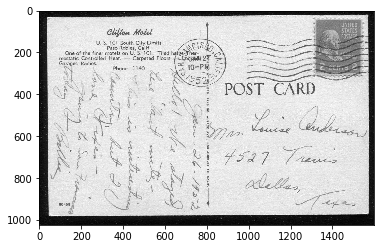

In [126]:
#I have folder of images of postcard backs on my desktop 
myPATH = "C://Users//SEAB//Desktop//postcardImages//newPostcardList//" + "postcard" + str(650) + "Back.jpg"
#the 0 indicates that we read the image in greyscale 
img = cv2.imread(myPATH,0)
#use pyplot to show the img 
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

Let's blur the image and then use Hough Circles. 

In [127]:
 if img is not None:
        img = cv2.medianBlur(img,5)
        #reconvert to color image to draw on later
        cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
        #strategy: first set most generous parameters, try to find initial circles. If not circles found return none. If 1-4 circles found, return this.
        #If more than 4 circles found, make parameters more restrictive

In the interest of readability, we split the code into blocks but keep in mind the following code only makes sense if the image was successfully read in.  

In [132]:
#starting with some parameters that should find circles in maybe 60-70% of postcard images based on what I tested 
#minDist indicates the minimum Distance between centers of circles found 
minDist = 200
#minimumRadius is the minimum radius of the circles found
minimumRadius = 100
#maximumRadius is the maximum radius of the circles found *note* I've found that this doesn't correspond exactly to the circle radius for some reason but must be set a little larger than the circles you expect to find
maximumRadius = 300
#I found this answer on stackexchange helpful to understand definition of parameter2 and parameter1 https://dsp.stackexchange.com/questions/22648/in-opecv-function-hough-circles-how-does-parameter-1-and-2-affect-circle-detecti
#Basically, since Hough Circles calls canny edge detection internally, the lower parameter2 is, the less edge points you need for a circle
parameter2 = 80
parameter1 = 100
initialGuess = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,minDist, param1 = parameter1, param2= parameter2, minRadius = minimumRadius,
maxRadius = maximumRadius)
print(initialGuess)

None


We see that initialGuess is None. 
This means our code that iterates through parameter2 and parameter1 will then execute: 

In [133]:
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,minDist, param1 = parameter1, param2= parameter2, minRadius = minimumRadius,
                                    maxRadius = maximumRadius)
while parameter1 >= 60 and (circles is None or np.size(circles) == 4 or circles[0][0][0] == 0):
    while parameter2 >= 60:
       parameter2 = parameter2 - 10
       minimumRadius = 40
       while minimumRadius <= 100:
            maximumRadius = minimumRadius + 100
            #print("parameter1 = " + str(parameter1), "parameter2 = " + str(parameter2), "minimumRadius = " + str(minimumRadius), "maximumRadius = " + str(maximumRadius))
            circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,minDist, param1 = parameter1, param2= parameter2, minRadius = minimumRadius,
                        maxRadius = maximumRadius)
            minimumRadius = minimumRadius + 10
    parameter2 = 80
    parameter1 = parameter1 - 10

In [134]:
circles

array([[[ 772.5,  250.5,  115.1],
        [1419.5,  158.5,  113.4]]], dtype=float32)

Let's draw the circles on the color image

In [135]:
 if circles is not None:
            for j in circles[0,:]:
            # draw the outer circle
                cv2.circle(cimg,(j[0],j[1]),j[2],(0,255,0),2)
            # draw the center of the circle
                cv2.circle(cimg,(j[0],j[1]),2,(0,0,255),3)

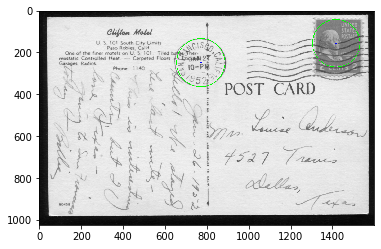

In [136]:
plt.imshow(cimg)
plt.show()

As you can see, the loop still found two circles, one of them being the dark image of the rectangular stamp. We don't want this but it is a minor issue since when we examine the area wtihin circles we can go by the one with lighter color. (our end goal being to read the text inside the circle). 

Also, it's important to note that this method is not perfect in the least. For example, often it would find circles in the handwritten text. A possible improvement would be to give the bounding box for the handwritten text and exclude circles found in this area. Another suggestion on stackExchange would be to change the dp (the third parameters of Hough Circles, currently set to 1) and approach from below and above. 